# Explore here

In [438]:
import pandas as pd
import matplotlib.pyplot as plt


# Download latest version
data_path1 = "/home/vscode/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1/train.csv"  # Replace with the correct file path
train_data = pd.read_csv(data_path1)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [439]:
train_data.shape

(614, 13)

In [440]:
data_path2 = "/home/vscode/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1/test.csv"  # Replace with the correct file path
test_data = pd.read_csv(data_path2)
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [441]:
test_data.shape

(367, 12)

In [442]:
# Suponiendo que train_data y test_data son DataFrames de Pandas
total_data = pd.concat([train_data, test_data], ignore_index=True)
total_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [443]:
total_data.shape

(981, 13)

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pickle

# EDA (ejemplo)
total_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [445]:
# EDA Detallado

# 1. Exploración inicial
print(total_data.head())
print(total_data.info())
print(total_data.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [446]:
print(total_data.shape, "\n") 
print(total_data.columns, "\n") 

categorical = [var for var in total_data.columns if total_data[var].dtype == 'object']
numerical = [var for var in total_data.columns if total_data[var].dtype != 'object']

print("Categorical Features:", categorical)
print("Numerical Features:", numerical)
print()

for var in numerical:
    print(f"{var}: [{total_data[var].min()}, {total_data[var].max()}]")

(981, 13) 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

Categorical Features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

ApplicantIncome: [0, 81000]
CoapplicantIncome: [0.0, 41667.0]
LoanAmount: [9.0, 700.0]
Loan_Amount_Term: [6.0, 480.0]
Credit_History: [0.0, 1.0]


In [447]:
# 5. Identificación de valores faltantes
print(total_data.isnull().sum())
# Aquí puedes decidir cómo tratar los valores faltantes (eliminar filas, imputar, etc.)


Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [448]:
# 6. Identificación de outliers

# método1
# Eliminar filas donde 'Credit_History' tiene valores faltantes
total_data = total_data.dropna(subset=['Credit_History'])

total_data.isna().sum()

Loan_ID                0
Gender                23
Married                3
Dependents            23
Education              0
Self_Employed         48
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      19
Credit_History         0
Property_Area          0
Loan_Status          338
dtype: int64

In [449]:

# 6. Identificación de outliers
from sklearn.impute import SimpleImputer

# Impute missing values in categorical features with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
total_data.loc[:, categorical] = categorical_imputer.fit_transform(total_data[categorical])

total_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term     19
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [450]:
# method3

# Impute missing values in numerical features with median
numerical_imputer = SimpleImputer(strategy='median')
total_data.loc[:, numerical] = numerical_imputer.fit_transform(total_data[numerical])

total_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [451]:
# Remove 'Loan_ID' from the list of categorical variables
categorical.remove('Loan_ID')

Visualize Categorical Values

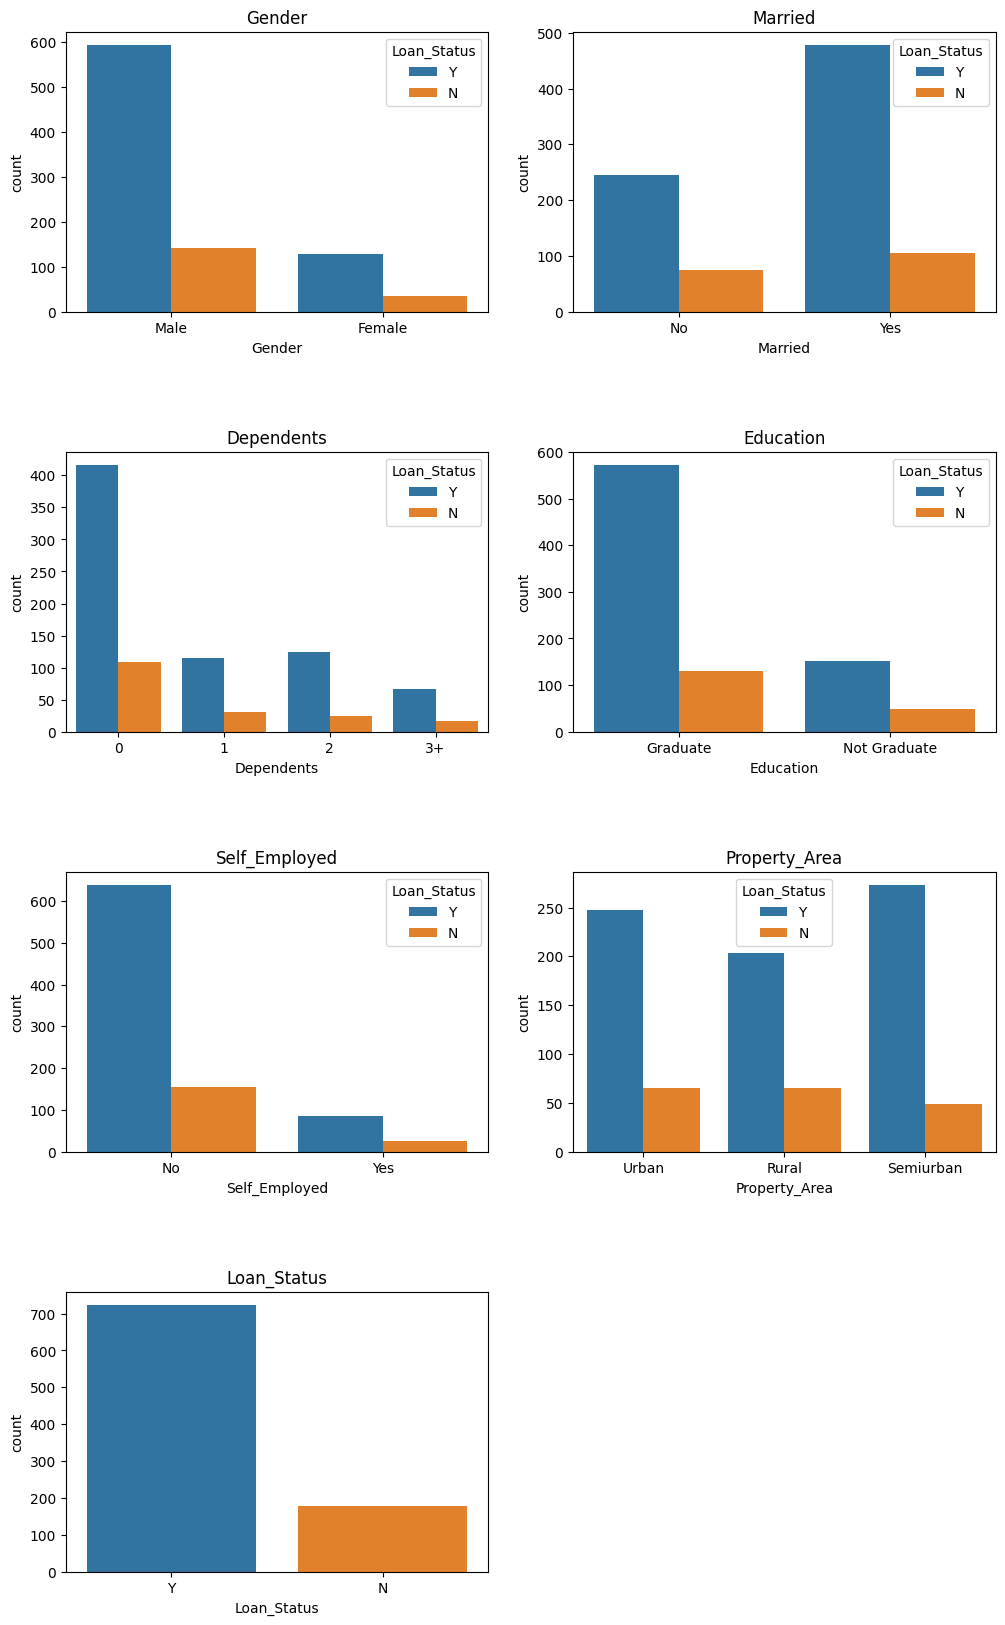

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming categorical is a list of categorical variable names
num_plots = len(categorical)

# Generate subplots dynamically
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Iterate over categorical variables
for idx, cat_col in enumerate(categorical):
    row, col = idx // 2, idx % 2
    # Create count plot for current categorical variable
    sns.countplot(x=cat_col, data=total_data, hue='Loan_Status', ax=axes[row, col])
    axes[row, col].set_title(cat_col)

# Remove empty subplots if any
if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

# Show plot
plt.show()

Visualize Numerical Values

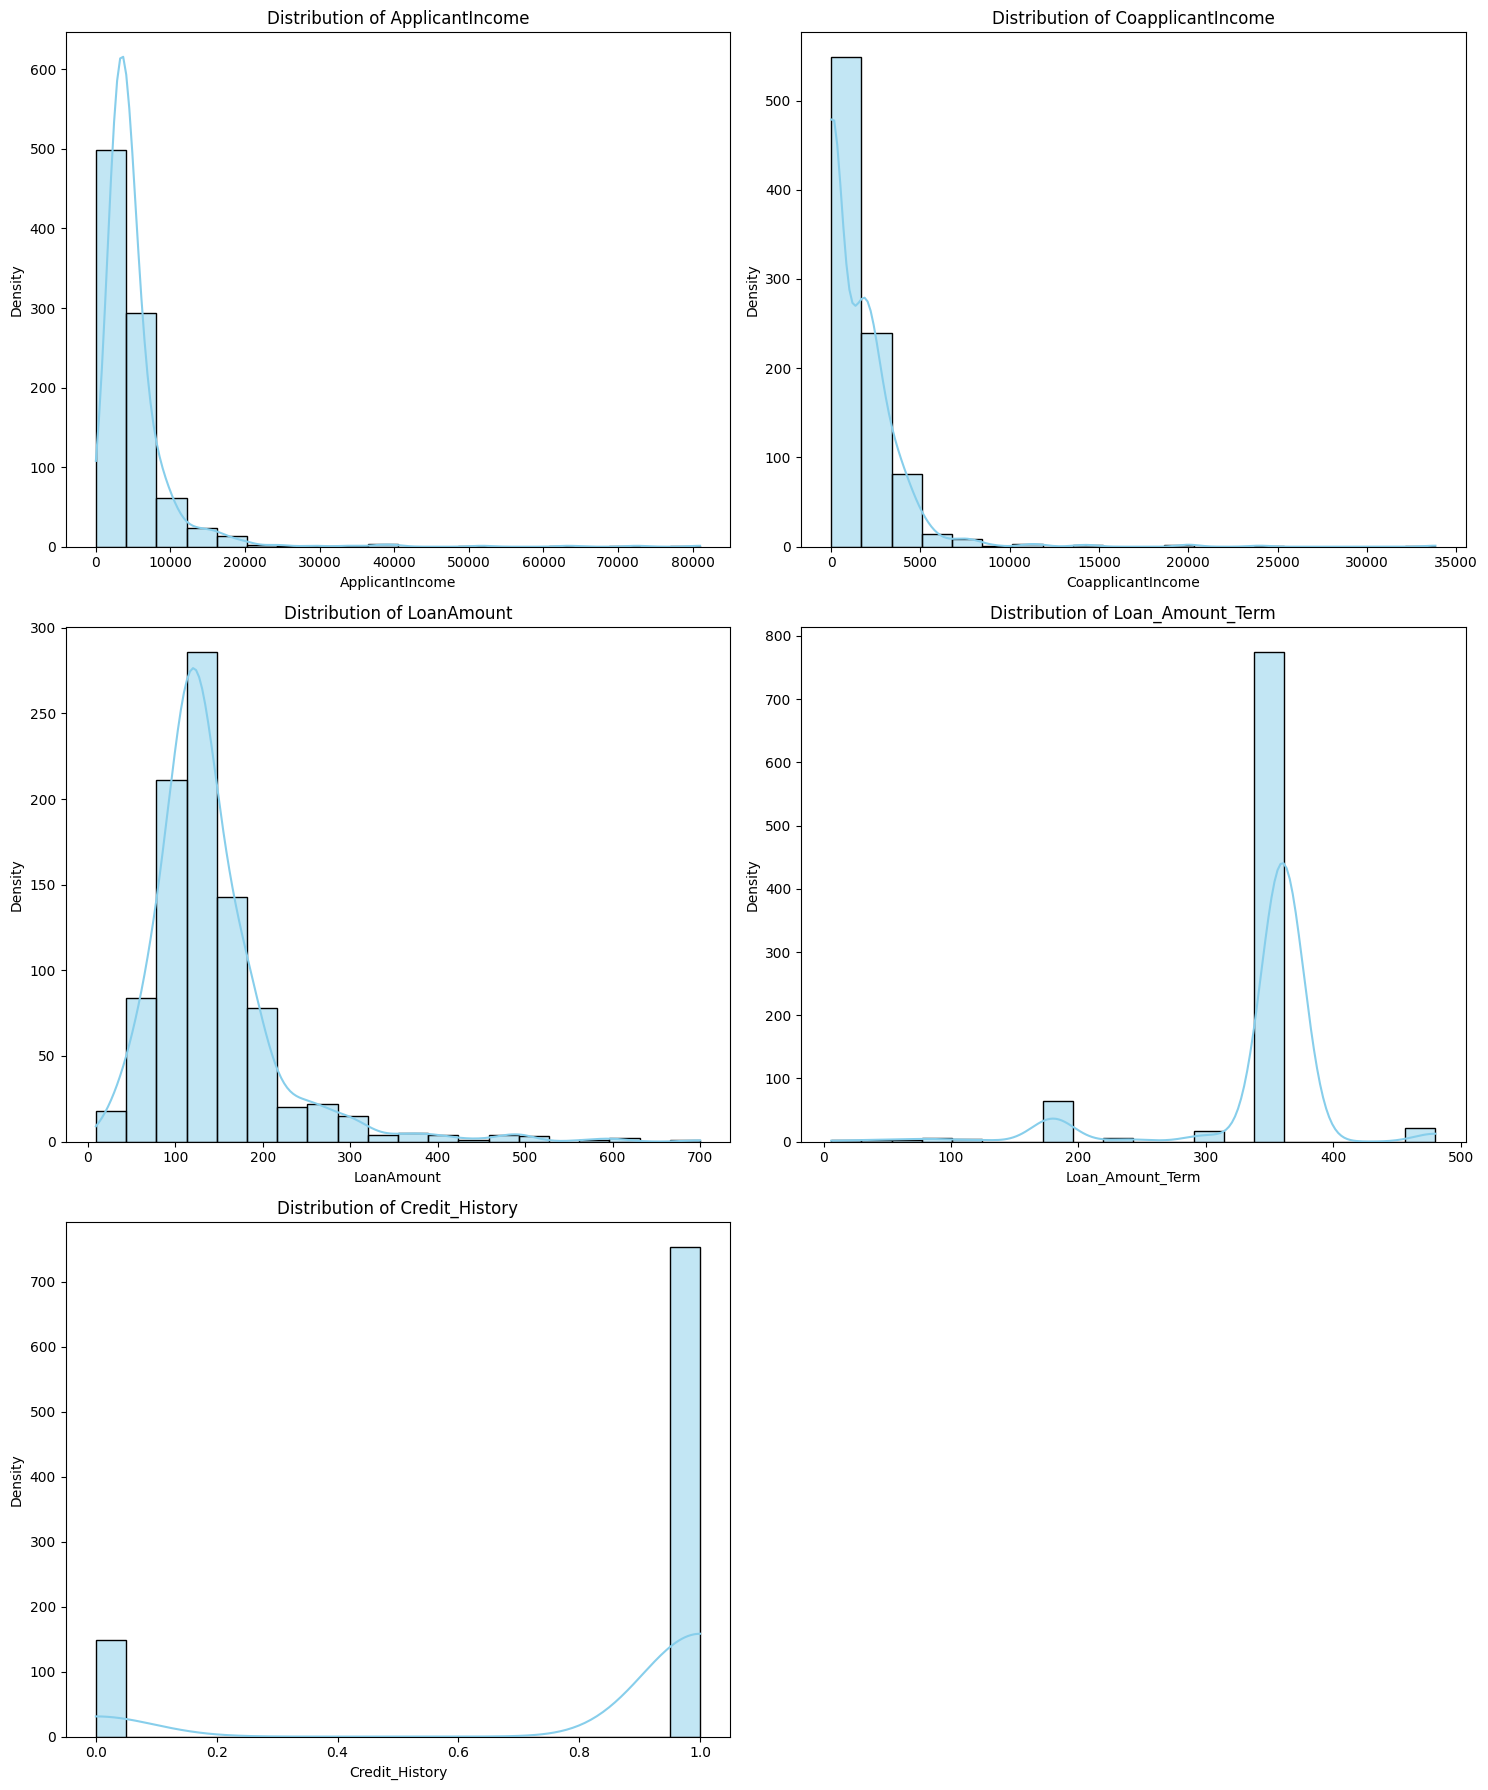

In [453]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed
num_rows = (len(numerical) + 1) // 2

# Plot histograms for all numerical features
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))

for i, var in enumerate(numerical):
    row = i // 2
    col = i % 2
    sns.histplot(data=total_data, x=var, kde=True, color='skyblue', bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Density')

# Remove empty subplots if any
if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

# Adjust layout
plt.tight_layout()
plt.show()

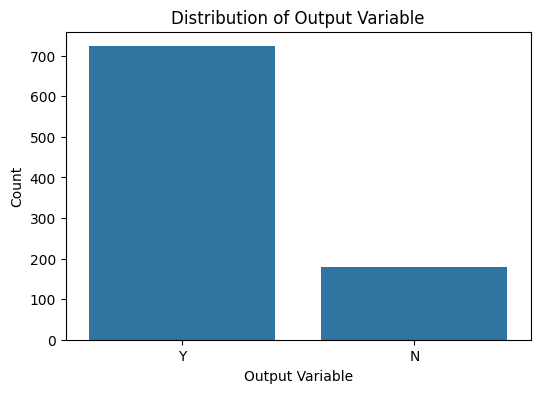

In [454]:
# Count the occurrences of each category in the output variable
output_var_counts = total_data['Loan_Status'].value_counts()

# Plot the counts using Seaborn's countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=total_data, x='Loan_Status')
plt.title('Distribution of Output Variable')
plt.xlabel('Output Variable')
plt.ylabel('Count')
plt.show()

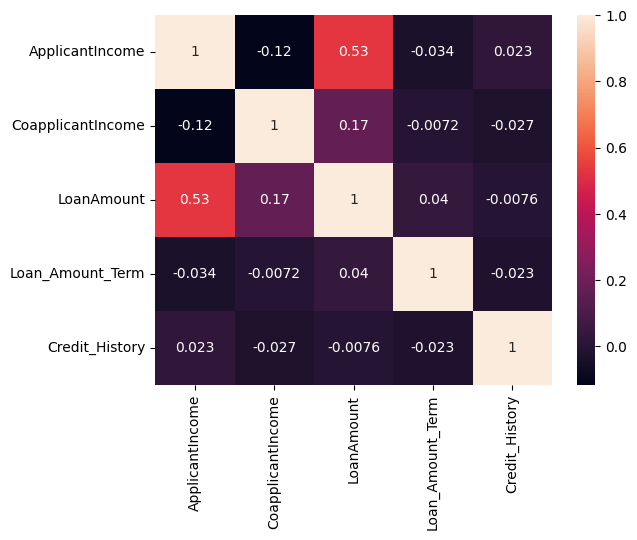

In [455]:
# Calculate correlation matrix using only numerical columns
corr_matrix = total_data[numerical].corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

Queremos predecir el estado del préstamo, que es una columna finita que depende de diferentes columnas, por lo que utilizaré la función de regresión logística para entrenar mi modelo y hacer las predicciones.

Primero, transformemos las columnas categóricas en numéricas.

In [456]:
total_data["Gender"] = total_data["Gender"].apply(lambda x: 1 if x == "Male" else 0)
total_data["Self_Employed"] = total_data["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)
total_data["Loan_Status"] = total_data["Loan_Status"].apply(lambda x: 1 if x == "Y" else 0)
total_data["Education"] = total_data["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
total_data["Married"] = total_data["Married"].apply(lambda x: 1 if x == "Yes" else 0)
total_data["Dependents"] = total_data["Dependents"].replace("3+", "3")



Aquí el rango entre columnas es demasiado grande, así que escalemos los valores.

In [457]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

total_data[numerical] = scaler.fit_transform(total_data[numerical])


total_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,0.110241,-0.637093,-0.207555,0.27095,0.443042,Urban,1
1,LP001003,1,1,1,1,0,-0.108832,-0.008611,-0.180477,0.27095,0.443042,Rural,0
2,LP001005,1,1,0,1,1,-0.382759,-0.637093,-1.019883,0.27095,0.443042,Urban,1
3,LP001006,1,1,0,0,0,-0.454918,0.345639,-0.288788,0.27095,0.443042,Urban,1
4,LP001008,1,0,0,1,0,0.136370,-0.637093,-0.004473,0.27095,0.443042,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,LP002969,1,1,1,1,0,-0.509254,0.266037,-0.573103,0.27095,0.443042,Semiurban,1
976,LP002971,1,1,3,0,1,-0.208159,0.103499,-0.383559,0.27095,0.443042,Urban,1
977,LP002975,1,1,0,1,0,-0.182375,-0.341606,-0.356482,0.27095,0.443042,Urban,1
979,LP002986,1,1,0,1,0,-0.036673,0.360226,0.225687,0.27095,0.443042,Rural,1


Seleccione las columnas independientes x y la columna dependiente y

In [458]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop(columns=['Loan_Status','Property_Area','Loan_ID'], axis = 1)
y = total_data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
10,1,1,2,1,0,-0.348151,-0.345357,-0.965728,0.27095,0.443042
407,0,0,0,0,0,-0.518944,-0.637093,-1.019883,0.27095,0.443042
268,0,0,0,1,0,-0.310427,-0.637093,-0.085706,0.27095,0.443042
421,0,0,0,0,0,-0.431212,-0.637093,-0.830340,0.27095,-2.257121
470,1,1,1,1,1,-0.304890,0.229362,0.279842,0.27095,0.443042
...,...,...,...,...,...,...,...,...,...,...
114,1,0,0,1,0,-0.028021,-0.637093,-0.315865,0.27095,0.443042
292,1,1,2,1,0,-0.356284,0.013061,-0.099245,0.27095,0.443042
933,1,0,0,1,0,-0.368397,0.504010,-0.288788,0.27095,0.443042
472,1,1,3,1,0,-0.090143,-0.637093,-0.559564,0.27095,0.443042


In [459]:
y_train


10     1
407    1
268    0
421    0
470    1
      ..
114    1
292    1
933    1
472    1
110    1
Name: Loan_Status, Length: 721, dtype: int64

Inicializar el modelo de regresión logística

In [460]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [461]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [462]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.861878453038674

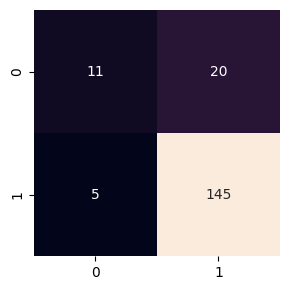

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix


regresion_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(regresion_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

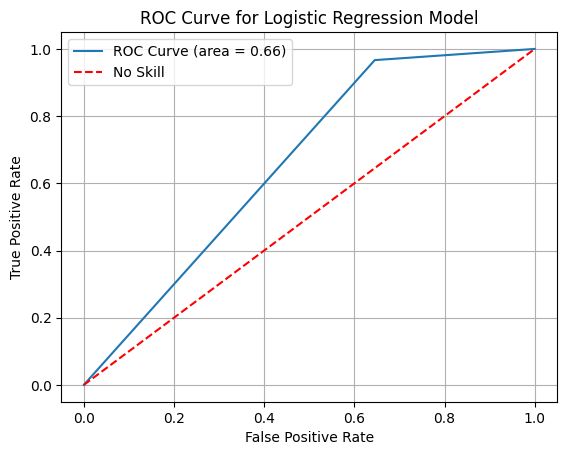

In [ ]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.grid()
plt.show()



Búsqueda en cuadrícula (optimizacion)

In [465]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [466]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [467]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.856353591160221

In [468]:
import joblib

try:
    joblib.dump(model_grid,"mymodel.joblib")
except Exception as e:
    print(f"Error: {e}")